## 讀入所需的libary

In [1]:
import pandas as pd
import numpy as np 
import nltk
import math
nltk.download("punkt") # 下載需要用到的語料庫
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\88690\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### 讀入PRIDE & PREJUDICE

In [2]:
pride = pd.read_csv("clean_pride_book.csv").drop("Unnamed: 0",axis=1)[['sentence','chapter','word']]
pride.head()

,sentence,chapter,word
0,TPRIDE PREJUDICE,0,tpride
1,TPRIDE PREJUDICE,0,prejudice
2,It is a truth universally acknowledged that a ...,1,truth
3,It is a truth universally acknowledged that a ...,1,universally
4,It is a truth universally acknowledged that a ...,1,acknowledged


# tfidf
tfidf是一種文字分析方式，透過計算文字在文章中和整篇文本中出現的次數來給予權重，來計算該字對於文本的重要性

## 計算詞頻(term frequency)

### 計算某文字在各chapter中出現次數

,,chapter_word
chapter,word,
18,mr,56
16,mr,41
43,elizabeth,34
18,darcy,28
43,mr,21


### 計算每個文章中總共有多少字


,chapter_total
chapter,
0,2
1,353
2,337
3,763
4,470


### 算tf
在文章中出現的比例，出現越多次代表該詞對該文章有較大影響

,chapter,word,chapter_word,chapter_total,tf
0,18,mr,56,2324,0.024096
1,16,mr,41,1493,0.027461
2,43,elizabeth,34,2097,0.016214
3,18,darcy,28,2324,0.012048
4,43,mr,21,2097,0.010014
...,...,...,...,...,...
37623,25,gives,1,660,0.001515
37624,25,given,1,660,0.001515
37625,25,girlfor,1,660,0.001515
37626,25,girl,1,660,0.001515


### 算IDF
計算某詞出現在幾篇chapter中(就算某詞在一個文章中出現多次，IDF仍只算一次)，因為若某詞在所有文章都出現過，代表該詞的資訊量較少

,idf
word,
aball,4.127134
oflondon,4.127134
oflong,4.127134
oflove,4.127134
oflydias,4.127134


### 算tfidf
將tf 和 idf 相乘即得出tfidf

,chapter,word,chapter_word,chapter_total,tf,idf,tfidf
0,18,mr,56,2324,0.024096,0.03279,0.000790
1,16,mr,41,1493,0.027461,0.03279,0.000900
2,43,mr,21,2097,0.010014,0.03279,0.000328
3,15,mr,19,783,0.024266,0.03279,0.000796
4,3,mr,18,763,0.023591,0.03279,0.000774


### 由小到大檢視tfidf

,chapter,word,chapter_word,chapter_total,tf,idf,tfidf
30065,49,youwrite,1,971,0.001030,4.127134,0.004250
25996,25,youwould,1,660,0.001515,2.517696,0.003815
25993,60,youwould,1,663,0.001508,2.517696,0.003797
25995,19,youwould,1,825,0.001212,2.517696,0.003052
25994,10,youwould,1,985,0.001015,2.517696,0.002556
...,...,...,...,...,...,...,...
2904,23,without,2,755,0.002649,0.119801,0.000317
2913,17,without,1,571,0.001751,0.119801,0.000210
10310,23,wished,1,755,0.001325,0.991640,0.001313
36322,0,tpride,1,2,0.500000,4.127134,2.063567


#### 找出tfidf較高的字

先找出每個chapter前10名的TFIDF

,chapter,word,chapter_word,chapter_total,tf,idf,tfidf
12461,61,inher,3,566,0.005300,2.335375,0.012378
5035,61,pemberley,5,566,0.008834,1.131402,0.009995
14778,61,mortified,2,566,0.003534,2.740840,0.009685
3949,61,marriage,5,566,0.008834,0.949081,0.008384
12508,61,georgiana,2,566,0.003534,2.335375,0.008252
28729,61,mix,1,566,0.001767,4.127134,0.007292
28730,61,maternal,1,566,0.001767,4.127134,0.007292
28739,61,lessignorant,1,566,0.001767,4.127134,0.007292
28740,61,lydiassociety,1,566,0.001767,4.127134,0.007292
28741,61,moralize,1,566,0.001767,4.127134,0.007292


在統計每個字出現在每篇tfidf前10名的次數

word
collins      12
gardiner      8
bingley       6
wickham       5
catherine     4
             ..
finding       1
fifty         1
fifteen       1
feverish      1
youth         1
Length: 514, dtype: int64

# ngram

### bigram

,sentence
0,"(TPRIDE, PREJUDICE)"
1,"(TPRIDE, PREJUDICE)"
2,"(It, is)"
2,"(is, a)"
2,"(a, truth)"
...,...
53100,"(been, the)"
53100,"(the, means)"
53100,"(means, of)"
53100,"(of, uniting)"


### trigram

,sentence
0,NaN
1,NaN
2,"(It, is, a)"
2,"(is, a, truth)"
2,"(a, truth, universally)"
...,...
53100,"(had, been, the)"
53100,"(been, the, means)"
53100,"(the, means, of)"
53100,"(means, of, uniting)"


### bigram 次數

sentence
(of, the)          6631
(to, be)           5746
(in, the)          5187
(of, her)          3895
(to, the)          3552
                   ... 
(am, all)             1
(notowe, you)         1
(None, at)            1
(were, natural)       1
(But, gracious)       1
Length: 58157, dtype: int64

拆成兩個columns 分別為word1 word2

,word1,word2
0,tpride,prejudice
1,tpride,prejudice
2,it,is
3,is,a
4,a,truth
...,...,...
1695838,been,the
1695839,the,means
1695840,means,of
1695841,of,uniting


計算street跟其他自一起出現的頻率

word1
the            157
gracechurch     52
grosvenor       18
in               1
dtype: int64

### 計算每個字的correlation


#### 轉成DTM格式

chapter
0                                      tpride prejudice
1     truth universally acknowledged single man poss...
2     mr_bennet among earliest waited mr bingley heh...
3     mrs_bennet however assistance fivedaughters as...
4     jane elizabeth alone former cautious inher pra...
                            ...                        
57    discomposure spirits extraordinary visit threw...
58    instead receiving letter excuse friend aseliza...
59    dear lizzy walking questionwhich elizabeth rec...
60    elizabeths spirits soon rising playfulness wan...
61    happy maternal feelings day mrs_bennet gotrid ...
Name: word, Length: 62, dtype: object

,aball,abatement,abhorrence,abhorrent,abide,abiding,abilities,able,ableto,ablow,...,youto,youtogether,youtook,youused,youwere,youwhen,youwhile,youwill,youwould,youwrite
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,0,0,1,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
59,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


#### 計算每個字對每篇文章的pearson correlation
hint:pandas有提供function，但是算得很慢，可以用numpy的

,aball,abatement,abhorrence,abhorrent,abide,abiding,abilities,able,ableto,ablow,...,youto,youtogether,youtook,youused,youwere,youwhen,youwhile,youwill,youwould,youwrite
aball,1.000000,-0.016393,-0.041910,-0.016393,-0.016393,-0.016393,-0.035819,-0.103525,-0.016393,-0.016393,...,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.035819,-0.037921,-0.016393
abatement,-0.016393,1.000000,-0.041910,-0.016393,-0.016393,-0.016393,-0.035819,-0.103525,-0.016393,-0.016393,...,-0.016393,1.000000,-0.016393,-0.016393,-0.016393,1.000000,-0.016393,0.334306,-0.037921,-0.016393
abhorrence,-0.041910,-0.041910,1.000000,-0.041910,-0.041910,-0.041910,-0.091570,0.337004,-0.041910,-0.041910,...,-0.041910,-0.041910,-0.041910,-0.041910,-0.041910,-0.041910,-0.041910,-0.091570,-0.096946,-0.041910
abhorrent,-0.016393,-0.016393,-0.041910,1.000000,-0.016393,-0.016393,-0.035819,-0.103525,-0.016393,-0.016393,...,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.035819,-0.037921,-0.016393
abide,-0.016393,-0.016393,-0.041910,-0.016393,1.000000,-0.016393,-0.035819,-0.103525,-0.016393,-0.016393,...,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.035819,-0.037921,-0.016393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youwhen,-0.016393,1.000000,-0.041910,-0.016393,-0.016393,-0.016393,-0.035819,-0.103525,-0.016393,-0.016393,...,-0.016393,1.000000,-0.016393,-0.016393,-0.016393,1.000000,-0.016393,0.334306,-0.037921,-0.016393
youwhile,-0.016393,-0.016393,-0.041910,-0.016393,-0.016393,1.000000,-0.035819,0.153217,-0.016393,-0.016393,...,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,1.000000,-0.035819,-0.037921,-0.016393
youwill,-0.035819,0.334306,-0.091570,-0.035819,-0.035819,-0.035819,0.056522,0.101034,-0.035819,-0.035819,...,-0.035819,0.334306,-0.035819,-0.035819,0.334306,0.334306,-0.035819,1.000000,-0.082855,-0.035819
youwould,-0.037921,-0.037921,-0.096946,-0.037921,-0.037921,-0.037921,-0.082855,-0.061305,-0.037921,-0.037921,...,-0.037921,-0.037921,0.432302,-0.037921,-0.037921,-0.037921,-0.037921,-0.082855,1.000000,-0.037921


,item1,aball,abatement,abhorrence,abhorrent,abide,abiding,abilities,able,ableto,...,youto,youtogether,youtook,youused,youwere,youwhen,youwhile,youwill,youwould,youwrite
0,aball,1.000000,-0.016393,-0.041910,-0.016393,-0.016393,-0.016393,-0.035819,-0.103525,-0.016393,...,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.035819,-0.037921,-0.016393
1,abatement,-0.016393,1.000000,-0.041910,-0.016393,-0.016393,-0.016393,-0.035819,-0.103525,-0.016393,...,-0.016393,1.000000,-0.016393,-0.016393,-0.016393,1.000000,-0.016393,0.334306,-0.037921,-0.016393
2,abhorrence,-0.041910,-0.041910,1.000000,-0.041910,-0.041910,-0.041910,-0.091570,0.337004,-0.041910,...,-0.041910,-0.041910,-0.041910,-0.041910,-0.041910,-0.041910,-0.041910,-0.091570,-0.096946,-0.041910
3,abhorrent,-0.016393,-0.016393,-0.041910,1.000000,-0.016393,-0.016393,-0.035819,-0.103525,-0.016393,...,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.035819,-0.037921,-0.016393
4,abide,-0.016393,-0.016393,-0.041910,-0.016393,1.000000,-0.016393,-0.035819,-0.103525,-0.016393,...,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.035819,-0.037921,-0.016393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12580,youwhen,-0.016393,1.000000,-0.041910,-0.016393,-0.016393,-0.016393,-0.035819,-0.103525,-0.016393,...,-0.016393,1.000000,-0.016393,-0.016393,-0.016393,1.000000,-0.016393,0.334306,-0.037921,-0.016393
12581,youwhile,-0.016393,-0.016393,-0.041910,-0.016393,-0.016393,1.000000,-0.035819,0.153217,-0.016393,...,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,-0.016393,1.000000,-0.035819,-0.037921,-0.016393
12582,youwill,-0.035819,0.334306,-0.091570,-0.035819,-0.035819,-0.035819,0.056522,0.101034,-0.035819,...,-0.035819,0.334306,-0.035819,-0.035819,0.334306,0.334306,-0.035819,1.000000,-0.082855,-0.035819
12583,youwould,-0.037921,-0.037921,-0.096946,-0.037921,-0.037921,-0.037921,-0.082855,-0.061305,-0.037921,...,-0.037921,-0.037921,0.432302,-0.037921,-0.037921,-0.037921,-0.037921,-0.082855,1.000000,-0.037921


轉成一對一的格式後，把corr是1的去掉

,item1,item2,correlation
0,aball,aball,1.000000
1,abatement,aball,-0.016393
2,abhorrence,aball,-0.041910
3,abhorrent,aball,-0.016393
4,abide,aball,-0.016393
...,...,...,...
158382220,youwhen,youwrite,-0.016393
158382221,youwhile,youwrite,-0.016393
158382222,youwill,youwrite,-0.035819
158382223,youwould,youwrite,-0.037921


#### 列出跟 elizabeth 還有my最相關的前6個字

Text(0.5, 1.0, 'elizabeth')

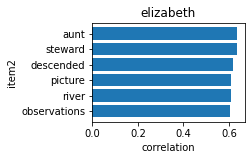

Text(0.5, 1.0, 'pride')

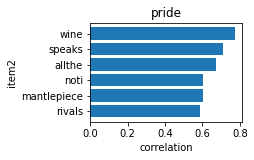